#### ex8 Collaborative filtering learning algorithm

You will implement the collaborative filtering learning algorithms. The collorative filtering algorithm in the setting of movie recommendation considers a set of n-dimensional parameter vectors x1,x2,...,x(nm) and theta1, theta2,...,theta(nu), where the model predicts the rating for movie i by user j. y(i,j)=thetaj.T*xi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.optimize import minimize
from scipy.io import loadmat

#### Part 1: Loading movie ratings dataset 

You will start by loading the movie ratings dataset to understand the structure of the data.

In [6]:
print('Loading movie ratings dataset.');

#  Load data
movie=loadmat('ex8_movies.mat');
#  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 943 users
# R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a 
# rating to movie i
Y=movie['Y']
R=movie['R']
print(Y.shape)
print(R.shape)

Loading movie ratings dataset.
(1682, 943)
(1682, 943)


In [14]:
#  From the matrix, we can compute statistics like average rating.
print('Average rating for movie 1 (Toy Story): ', np.mean(Y[0,R[0,:]]));

Average rating for movie 1 (Toy Story):  4.52067868505


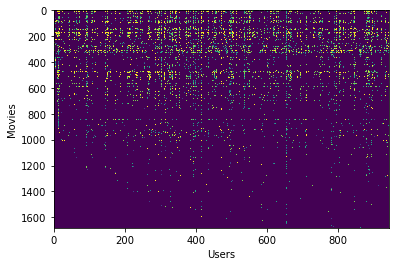

In [15]:
#  We can "visualize" the ratings matrix by plotting it with imagesc
# need aspect='auto' for a ~16:9 (vs almost vertical) aspect
plt.imshow(Y, aspect='auto') 
plt.ylabel('Movies')
plt.xlabel('Users')
plt.show(block=False)

#### Part 2: Collaborative Filtering Cost Function
You will now implement the cost function for collaborative filtering.
To help you debug your cost function, we have included set of weights
that we trained on that. Specifically, you should complete the code in 
cofiCostFunc.m to return J.

In [ ]:
# Load pre-trained weights (X, Theta, num_users, num_movies, num_features)
load ('ex8_movieParams.mat');

%  Reduce the data set size so that this runs faster
num_users = 4; num_movies = 5; num_features = 3;
X = X(1:num_movies, 1:num_features);
Theta = Theta(1:num_users, 1:num_features);
Y = Y(1:num_movies, 1:num_users);
R = R(1:num_movies, 1:num_users);